In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

res = pd.read_csv('lending-club-values.csv')


In [2]:
res.head()

,confidence_diff,original_class,class_change,no_features,nsamples,explainer,time
0,0.000000e+00,1,False,0,auto,shap,113.274503
1,0.000000e+00,1,False,1,auto,shap,0.252353
2,0.000000e+00,1,False,2,auto,shap,0.232378
3,7.152557e-07,1,False,3,auto,shap,0.237366
4,8.261204e-05,1,False,4,auto,shap,0.229386


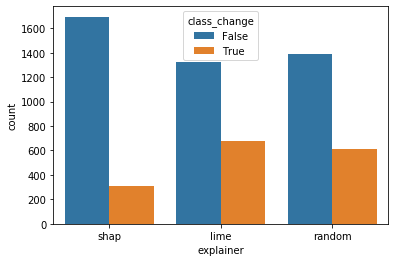

In [3]:
sns.countplot(x="explainer",data=res[res['nsamples'] == 'auto'], hue = 'class_change')

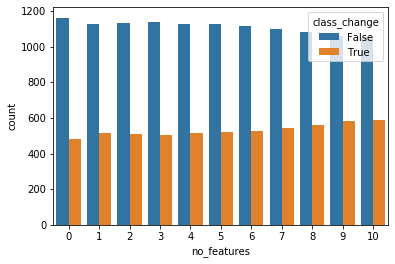

In [4]:
sns.countplot(x="no_features",data=res, hue = 'class_change')

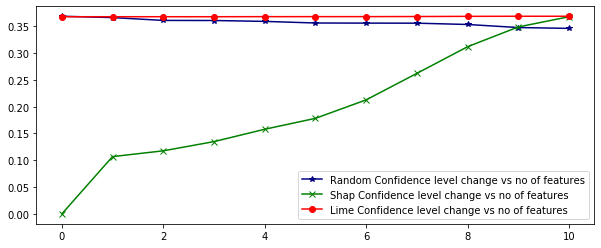

In [5]:
avg_random = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].mean() 
avg_shap = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].mean()
avg_lime = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].mean()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random Confidence level change vs no of features')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap Confidence level change vs no of features')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime Confidence level change vs no of features')
plt.legend(loc='best')

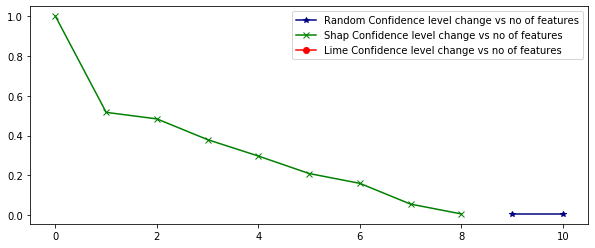

In [6]:
# avg = res[res['confidence_diff'] == 0.0].groupby("no_features")["confidence_diff"].count() / res.groupby("no_features")["confidence_diff"].count() # / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_random = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_shap = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count()
avg_lime = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_shap) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random Confidence level change vs no of features')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap Confidence level change vs no of features')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime Confidence level change vs no of features')
plt.legend(loc='best')

In [7]:
res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].mean()

no_features
0     0.367732
1     0.367732
2     0.367733
3     0.367733
4     0.367869
5     0.367899
6     0.367912
7     0.368109
8     0.368410
9     0.368609
10    0.368627
Name: confidence_diff, dtype: float64

In [22]:
res_new = pd.read_csv('lending-club-values.csv')

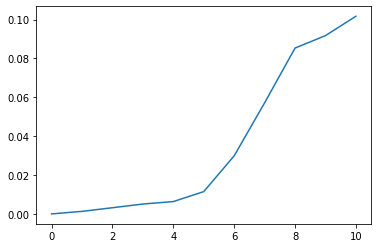

In [25]:
plt.plot(res_new.groupby("no_features")["confidence_diff"].mean())

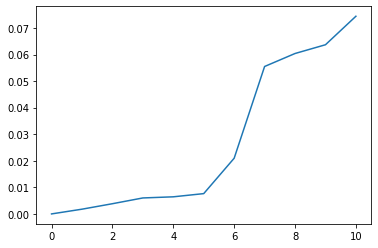

In [26]:
plt.plot(res_new[res_new['explainer'] == 'lime'].groupby("no_features")["confidence_diff"].mean())

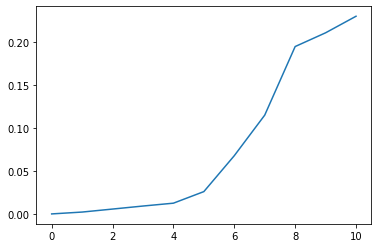

In [27]:
plt.plot(res_new[res_new['explainer'] == 'shap'].groupby("no_features")["confidence_diff"].mean())

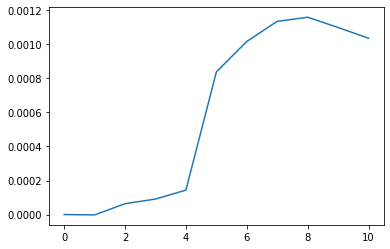

In [28]:
plt.plot(res_new[res_new['explainer'] == 'random'].groupby("no_features")["confidence_diff"].mean())